In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,'diabetic','no diabetic')

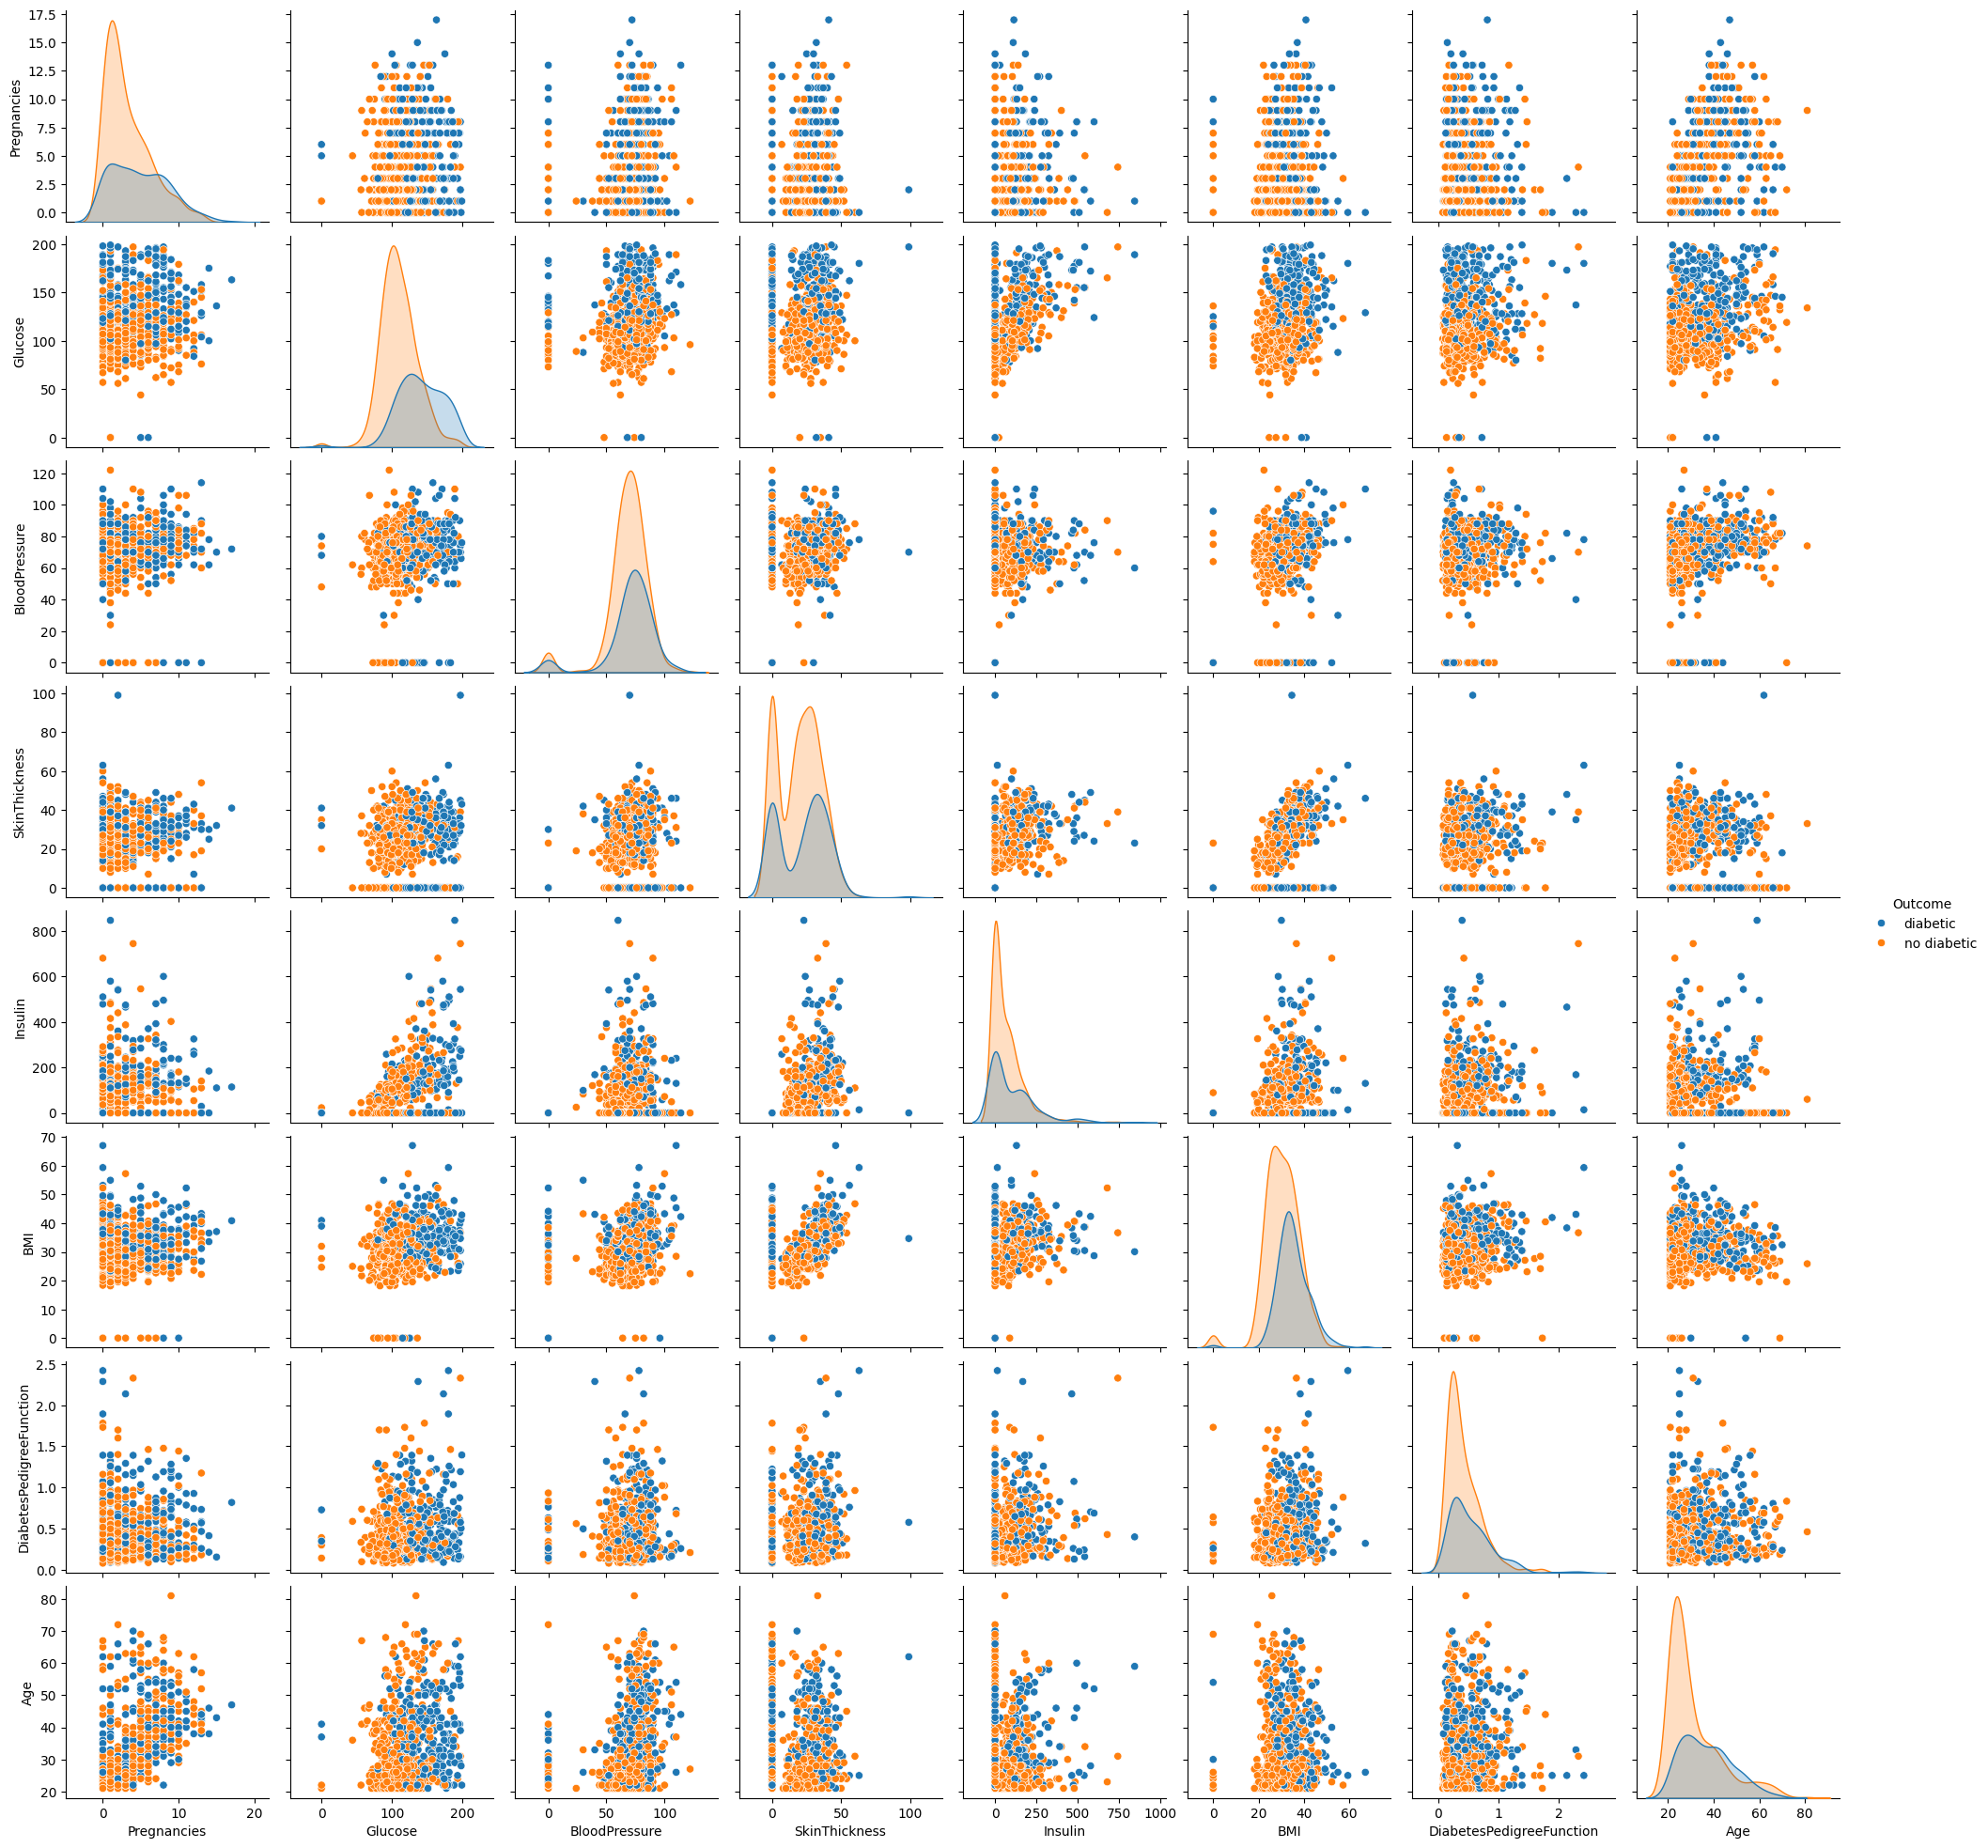

In [ ]:
import seaborn as sns
sns.pairplot(df,hue="Outcome")

In [ ]:
import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=0)

In [ ]:
#impprt libraries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F


In [ ]:
#creating tensors
X_train= torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)
y_train= torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)

In [ ]:
#creating an ANN model

import torch
import torch.nn as nn
import torch.nn.functional as F

class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden_layer1=20, hidden_layer2=20, output_layer=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden_layer1)
        self.f_connected2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_layer)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x



In [ ]:
#instantiate the model
torch.manual_seed(20)
model= ANN_Model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
#backward propagation
loss_function= nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs=100
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model.forward(X_train)
  loss=loss_function(y_pred,y_train)
  final_losses.append(loss)
  if 1%10==1:
    print("epoch number :{} and the loss is : {}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch number :1 and the loss is : 3.4572105407714844
epoch number :2 and the loss is : 1.7547035217285156
epoch number :3 and the loss is : 1.4100368022918701
epoch number :4 and the loss is : 0.9451971650123596
epoch number :5 and the loss is : 1.157417893409729
epoch number :6 and the loss is : 0.8915756940841675
epoch number :7 and the loss is : 0.7283688187599182
epoch number :8 and the loss is : 0.8199500441551208
epoch number :9 and the loss is : 0.6772927045822144
epoch number :10 and the loss is : 0.6956124305725098
epoch number :11 and the loss is : 0.8019208312034607
epoch number :12 and the loss is : 0.7153993844985962
epoch number :13 and the loss is : 0.6444706916809082
epoch number :14 and the loss is : 0.6793992519378662
epoch number :15 and the loss is : 0.6693856120109558
epoch number :16 and the loss is : 0.6191174387931824
epoch number :17 and the loss is : 0.6354078650474548
epoch number :18 and the loss is : 0.6668112874031067
epoch number :19 and the loss is : 0.6

In [ ]:
#plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline


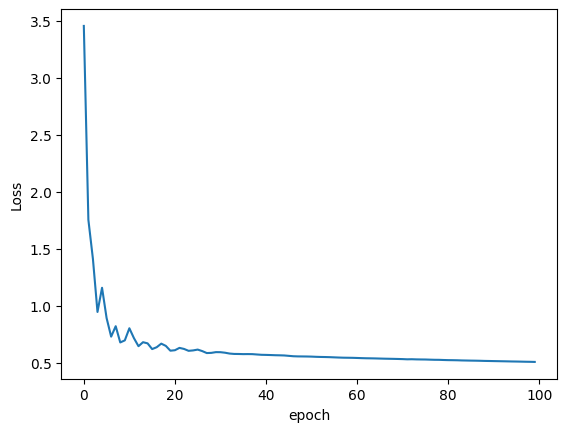

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'final_losses' is a PyTorch tensor
final_losses_detached = [loss.detach().numpy() for loss in final_losses]

plt.plot(range(epochs), final_losses_detached)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()


In [ ]:
#prediction in x test data
predictions=[]
with torch.no_grad():
  for i , data in enumerate (X_test):
    y_pred=model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
0
0
0
0
0
1
0
1
0
0
1
1
0
0
0
1
1
0
0
0
0
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
1
1
1
0
1
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0


In [ ]:
predictions

[1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[86, 21],
       [23, 24]])

Text(95.72222222222221, 0.5, 'predicted values')

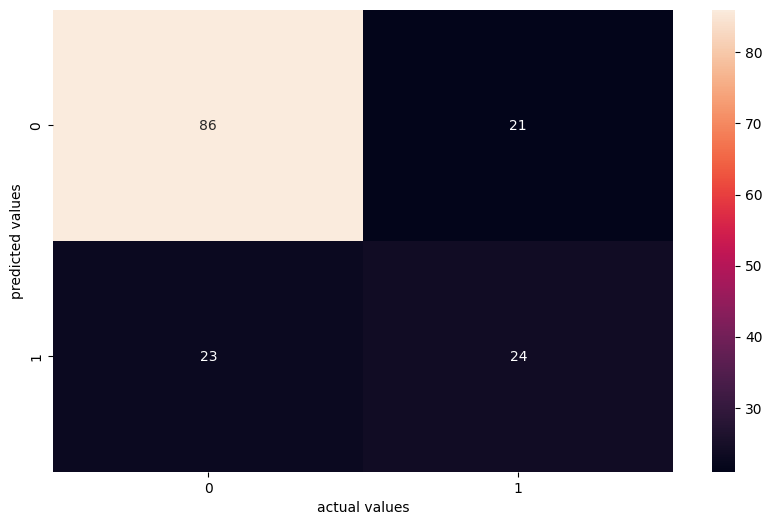

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7142857142857143

In [ ]:
#save the model
torch.save(model,'DIABETES.pt')